In [9]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import pylab as plt
#!pip install --user gpy 
#!pip install --user plotly 

import GPy
from IPython.display import display

#GPy.plotting.change_plotting_library('plotly')
GPy.plotting.change_plotting_library('plotly_offline')

sns.set(color_codes=True)


data = pd.read_csv('data/houses2.csv', sep='|').drop(columns=['Unnamed: 0'])

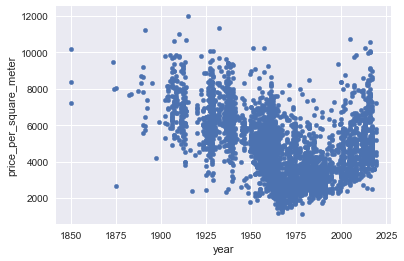

In [54]:

data.plot.scatter(x='year', y='price_per_square_meter')
plt.savefig('fig/year_price_scatter.eps', format='eps')

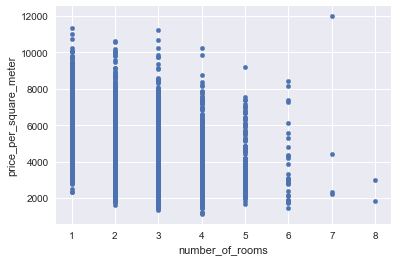

In [61]:
num_data = data[['year','number_of_rooms','price_per_square_meter']].apply(pd.to_numeric, errors='coerce').dropna()

num_data.plot.scatter(x='number_of_rooms', y='price_per_square_meter')

In [14]:
data

,condition,elevator,energy_class,floor,housetype,neighborhood,price,price_per_square_meter,number_of_rooms,rooms,square_meters,year
0,hyvä,on,G,5/5,kt,Kamppi,191050,10055,1,h,"19,00",1929
1,tyyd.,ei,NaN,3/4,kt,Munkkivuori,143000,5789,1,"h, kk, kh","24,70",1957
2,tyyd.,on,E2007,6/6,kt,Harju,167000,6680,1,h+kk+alk+wc,"25,00",1940
3,tyyd.,ei,F,1/4,kt,Ruskeasuo,157000,6181,1,"h, kk","25,40",1951
4,hyvä,ei,NaN,2/3,kt,Puotila,133000,4926,1,"h, kk, alk, vh...","27,00",1961
5,hyvä,on,E2007,2/4,kt,Haaga,181500,6259,1,h+kk+parv,"29,00",1963
6,hyvä,ei,G2013,1/3,kt,Käpylä,186000,6414,1,"h, k","29,00",1943
7,tyyd.,on,NaN,3/7,kt,Kallio,189000,6517,1,h+kk+kph,"29,00",1962
8,tyyd.,ei,D2007,3/3,kt,Mellunmäki,98000,3267,1,"h, kk, kph","30,00",1968
9,hyvä,on,E,6/7,kt,Puotinharju,138000,4452,1,h+kk+kph,"31,00",1963


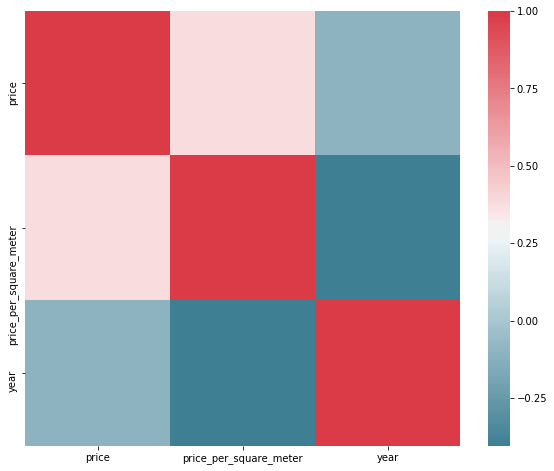

In [37]:
corr = data.corr()
f, ax = pl.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [22]:
data[['year','number_of_rooms','price_per_square_meter']]

,year,number_of_rooms,price_per_square_meter
0,1929,1,10055
1,1957,1,5789
2,1940,1,6680
3,1951,1,6181
4,1961,1,4926
5,1963,1,6259
6,1943,1,6414
7,1962,1,6517
8,1968,1,3267
9,1963,1,4452


In [74]:

num_data = data[['year','number_of_rooms','price_per_square_meter']].apply(pd.to_numeric, errors='coerce').dropna()

X = np.array(num_data[['year']])
Y = np.array(num_data['price_per_square_meter'])[:, None]

kernel = GPy.kern.RBF(input_dim=X.shape[1], variance=1., lengthscale=1.) 

m = GPy.models.GPRegression(X,Y,kernel)


m.optimize(messages=True)
#m.optimize_restarts(num_restarts = 10)

display(m)
fig = m.plot()
GPy.plotting.show(fig, filename='basic_gp_regression_notebook_optimized')


Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    07s32  0006   5.612593e+08   6.995419e+15 
    09s44  0008   3.087243e+08   7.141256e+14 
    11s54  0010   1.731401e+08   7.315169e+13 
    13s26  0012   9.764736e+07   7.728902e+12 
    16s60  0016   3.129623e+07   8.334752e+10 
    21s27  0021   1.663024e+07   4.890507e+09 
    27s93  0029   1.374565e+06   3.845172e+06 
    36s30  0039   1.956843e+05   3.861098e+04 
    44s04  0048   3.983817e+04   1.132900e+00 
    54s98  0060   2.963661e+04   9.081324e-04 
 01m09s55  0076   2.948562e+04   2.979171e-03 

/u/07/akalervo/unix/.local/lib/python3.6/site-packages/GPy/kern/src/rbf.py:43: RuntimeWarning:

overflow encountered in square



 01m11s24  0078   2.988116e+04   1.509099e-08 
 01m17s64  0085   2.943906e+04   1.752358e-01 
 01m44s58  0115   2.937875e+04   1.928400e-08 
Runtime:  01m44s58
Optimization status: Converged



GP_regression.,value,constraints,priors
rbf.variance,21114068.202053506,+ve,
rbf.lengthscale,7.1870329997867355,+ve,
Gaussian_noise.variance,1689224.33149206,+ve,


This is the format of your plot grid:
[ (1,1) x1,y1 ]



In [69]:
slices = [-1, 0, 1.5]
figure = GPy.plotting.plotting_library().figure(3, 1, 
                        shared_xaxes=True,
                        subplot_titles=('slice at -1', 
                                        'slice at 0', 
                                        'slice at 1.5', 
                                        )
                            )
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(1,y)], row=(i+1), plot_data=False)
GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]
[ (3,1) x1,y3 ]



In [70]:


slices = [-1, 0, 1.5]
figure = GPy.plotting.plotting_library().figure(3, 1, 
                        shared_xaxes=True,
                        subplot_titles=('slice at -1', 
                                        'slice at 0', 
                                        'slice at 1.5', 
                                        )
                            )
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(0,y)], row=(i+1), plot_data=False)
GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing_vertical')



This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]
[ (3,1) x1,y3 ]



In [53]:
m.optimize(messages=True)
#m.optimize_restarts(num_restarts = 10)

display(m)
fig = m.plot()
GPy.plotting.show(fig, filename='basic_gp_regression_notebook_optimized')

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0000   2.754721e+09           nan 
    03s82  0003   1.186377e+09   1.802329e+17 
    11s73  0010   1.530122e+08   5.731021e+13 
    15s46  0013   6.809964e+07   2.027908e+12 
    21s27  0017   2.152429e+07   2.051332e+10 
    32s86  0025   2.282374e+06   2.525770e+06 
    39s27  0029   7.539190e+05   2.805052e+04 
    43s57  0032   3.360118e+05   9.583455e+02 
    46s73  0034   2.008006e+05   1.007603e+02 

/u/07/akalervo/unix/.local/lib/python3.6/site-packages/GPy/kern/src/rbf.py:43: RuntimeWarning:

overflow encountered in square



    48s72  0036   1.241624e+05   1.057084e+01 

/u/07/akalervo/unix/.local/lib/python3.6/site-packages/GPy/kern/src/stationary.py:167: RuntimeWarning:

overflow encountered in true_divide



    50s11  0037   9.944348e+04           nan 

/u/07/akalervo/unix/.local/lib/python3.6/site-packages/GPy/kern/src/rbf.py:46: RuntimeWarning:

invalid value encountered in multiply



    52s58  0039   3.760192e+04           nan 
    53s72  0040   3.014837e+04           nan 

/u/07/akalervo/unix/.local/lib/python3.6/site-packages/paramz/optimization/verbose_optimization.py:160: RuntimeWarning:

invalid value encountered in less



    57s31  0043   2.976483e+04           nan 

/u/07/akalervo/unix/.local/lib/python3.6/site-packages/paramz/transformations.py:108: RuntimeWarning:

invalid value encountered in greater

/u/07/akalervo/unix/.local/lib/python3.6/site-packages/paramz/transformations.py:113: RuntimeWarning:

invalid value encountered in greater



    58s68  0048   2.976483e+04           nan 
Runtime:     58s68
Optimization status: Converged



LinAlgError: not positive definite, even with jitter.